<a href="https://colab.research.google.com/github/Anastasios-K/Classification/blob/master/Visual%20in%20PROGRESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [0]:
loading = load_wine()
df= pd.DataFrame(loading['data'], columns = loading['feature_names']); #df['targets'] = loading['target']

In [0]:
print(df)

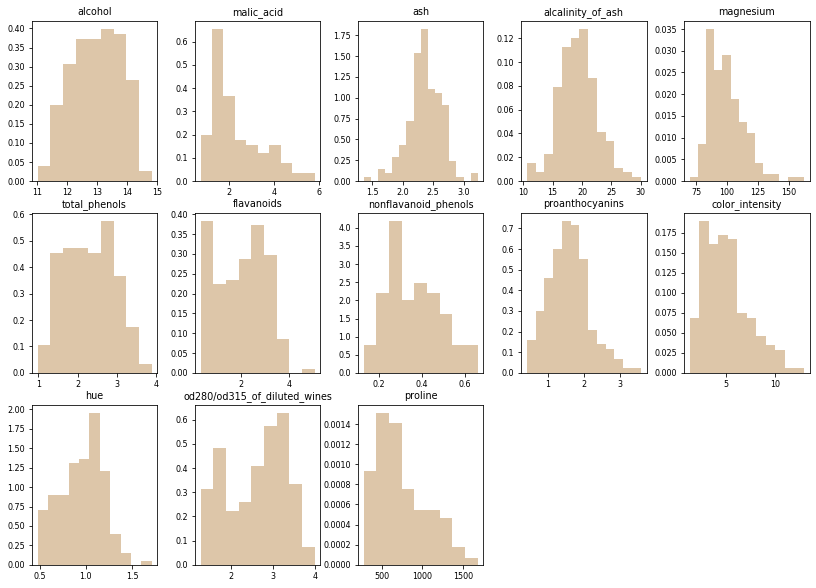

In [6]:
num_of_subplot = 1
#if len(df.columns) % 5 == 0:
 # length= len(df.columns)//5
#elif len(df.columns) % 5 <= 5:
 # length= len(df.columns)//5 + 1
#else:
  #length= len(df.columns)//5 + 2

figure = plt.figure(
    #num= 1,
    figsize= (12,10),
    facecolor='w'
    )
plt.subplots_adjust(
    left= 0.1,
    right= 1,
    wspace= 0.3,
    hspace= 0.2
    )
plt.rc('font', size= 8)
for column in df:
  Shapiro_Wilk = np.round(stats.shapiro(df[column]), decimals = 3)
  _, bins = np.histogram(df[column], bins= 'auto')
  plt.subplot(3, 5, num_of_subplot)
  y_axis, x_axis, _ = plt.hist(
      df[column],
      bins= bins,
      color= 'tan',
      density= True,
      alpha= 0.75,
      histtype= 'bar'
      )
  plt.title(column)
  num_of_subplot += 1
#plt.show()

In [44]:
for i, column in enumerate(df):
  print(df.columns[i])

alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline


In [101]:
a = np.array(df['ash'])
print(a)

[2.43 2.14 2.67 2.5  2.87 2.45 2.45 2.61 2.17 2.27 2.3  2.32 2.41 2.39
 2.38 2.7  2.72 2.62 2.48 2.56 2.28 2.65 2.36 2.52 2.61 3.22 2.62 2.14
 2.8  2.21 2.7  2.36 2.36 2.7  2.65 2.41 2.84 2.55 2.1  2.51 2.31 2.12
 2.59 2.29 2.1  2.44 2.28 2.12 2.4  2.27 2.04 2.6  2.42 2.68 2.25 2.46
 2.3  2.68 2.5  1.36 2.28 2.02 1.92 2.16 2.53 2.56 1.7  1.92 2.36 1.75
 2.21 2.67 2.24 2.6  2.3  1.92 1.71 2.23 1.95 2.4  2.   2.2  2.51 2.32
 2.58 2.24 2.31 2.62 2.46 2.3  2.32 2.42 2.26 2.22 2.28 2.2  2.74 1.98
 2.1  2.21 1.7  1.9  2.46 1.88 1.98 2.27 2.12 2.28 1.94 2.7  1.82 2.17
 2.92 2.5  2.5  2.2  1.99 2.19 1.98 2.   2.42 3.23 2.73 2.13 2.39 2.17
 2.29 2.78 2.3  2.38 2.32 2.4  2.4  2.36 2.25 2.2  2.54 2.64 2.19 2.61
 2.7  2.35 2.72 2.35 2.2  2.15 2.23 2.48 2.38 2.36 2.62 2.48 2.75 2.28
 2.1  2.32 2.38 2.64 2.7  2.64 2.38 2.54 2.58 2.35 2.3  2.26 2.6  2.3
 2.69 2.86 2.32 2.28 2.48 2.45 2.48 2.26 2.37 2.74]


[11.03       11.45222222 11.87444444 12.29666667 12.71888889 13.14111111
 13.56333333 13.98555556 14.40777778 14.83      ] 10
[0.74  1.246 1.752 2.258 2.764 3.27  3.776 4.282 4.788 5.294 5.8  ] 11
[1.36     1.476875 1.59375  1.710625 1.8275   1.944375 2.06125  2.178125
 2.295    2.411875 2.52875  2.645625 2.7625   2.879375 2.99625  3.113125
 3.23    ] 17
[10.6        12.09230769 13.58461538 15.07692308 16.56923077 18.06153846
 19.55384615 21.04615385 22.53846154 24.03076923 25.52307692 27.01538462
 28.50769231 30.        ] 14
[ 70.          76.57142857  83.14285714  89.71428571  96.28571429
 102.85714286 109.42857143 116.         122.57142857 129.14285714
 135.71428571 142.28571429 148.85714286 155.42857143 162.        ] 15
[0.98       1.30222222 1.62444444 1.94666667 2.26888889 2.59111111
 2.91333333 3.23555556 3.55777778 3.88      ] 10
[0.34       0.86666667 1.39333333 1.92       2.44666667 2.97333333
 3.5        4.02666667 4.55333333 5.08      ] 10
[0.13       0.18888889 0.24777778 

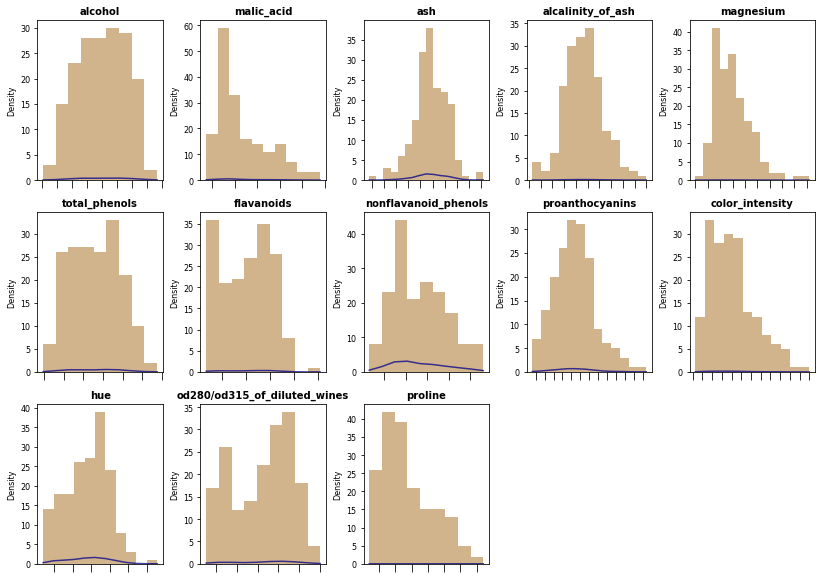

In [147]:
figure = plt.figure(
    #num= 1,
    figsize= (12,10),
    facecolor='w'
    )
plt.subplots_adjust(
    left= 0.1,
    right= 1,
    wspace= 0.3,
    hspace= 0.2
    )
for i, column in enumerate(df):
  ax = plt.subplot(3,5, i+1)
  a, bins, _ = plt.hist(df[column], bins='auto', color='tan', histtype='bar')
  ax.set_title(df.columns[i], weight = 'bold', size = 10)
  ax.axes.get_yaxis().set_visible(False)
  ax.tick_params('x', reset = False, direction = 'out', length = 0, size=8, labelbottom=False)
  ax.locator_params('x', tight=True, nbins = len(bins))

  lineSP = np.linspace((np.min(bins)), (np.max(bins)), len(bins))
  ax = df[column].plot.kde(color= 'darkblue', ind=lineSP, alpha = 0.75)
  

  print(bins, len(bins))
  

In [0]:
def distribution_visualisation(df):
    len_indicator= len(df.columns) % 5
    num_of_subplot = 1
    normality_report = pd.DataFrame(columns = df.columns, index = ('Kolmogorov', 'Shapiro', 'Mean', 'Median'))
    
    if len_indicator == 0:
        length= len(df.columns)//5
    elif len_indicator <= 5:
        length= len(df.columns)//5 + 1
    else:
        length= len(df.columns)//5 + 2
    
    figure = plt.figure(
            num= 1,
            figsize= (5*2.5, length*3),
            facecolor='w',
            )
    plt.subplots_adjust(
            left= 0.1,
            right= 1,
            wspace= 0.13,
            hspace= 0.22
            )
    plt.rc('font', size= 8)
    
    for column in df:
        Kolmogorov = np.around((np.array(stats.kstest(df[column], 'norm'))),4)
        Shapiro_Wilk = np.around((np.array(stats.shapiro(df[column]))), 4)
        Mean = np.around((np.mean(df[column])),2)
        Median = np.around((np.median(df[column])),2)
        
        normality_report.loc['Kolmogorov', column] = Kolmogorov[1]; 
        normality_report.loc['Shapiro', column] = Shapiro_Wilk[1]
        normality_report.loc['Mean', column] = Mean; normality_report.loc['Median', column] = Median
        _, bins = np.histogram(df[column], bins= 'auto')
        
        plt.subplot(length, 5, num_of_subplot)
        y_axis, x_axis, _ = plt.hist(
                df[column],
                bins= bins,
                color= 'tan',
                density= True,
                alpha= 0.75,
                histtype= 'bar'
                )
        
        plt.title(column) 
        
        plt.tick_params(
                bottom= False,
                left= False
                )
        
        downward = 1
        for x in normality_report.index:       
            plt.text(
                    x_axis.max(),
                    y_axis.max()* downward,
                    str(x) + ": " + str(normality_report.loc[x, column]),
                    fontsize = 8,
                    fontweight = 'bold',
                    color = 'r',
                    ha = 'right',
                    va = 'top'
                    )
            downward = downward - 0.07
        
        lineSP = np.linspace((np.min(bins)), (np.max(bins)), len(bins))
        df[column].plot.kde(color= 'darkblue', ind=lineSP, alpha = 0.75)
        plt.gca().axes.get_yaxis().set_visible(False)
        num_of_subplot = num_of_subplot + 1
    plt.show()
    return figure, normality_report

if __name__ == "__main__":
    pass

[11.03       11.45222222 11.87444444 12.29666667 12.71888889 13.14111111
 13.56333333 13.98555556 14.40777778 14.83      ] 10
[0.74  1.246 1.752 2.258 2.764 3.27  3.776 4.282 4.788 5.294 5.8  ] 11
[1.36     1.476875 1.59375  1.710625 1.8275   1.944375 2.06125  2.178125
 2.295    2.411875 2.52875  2.645625 2.7625   2.879375 2.99625  3.113125
 3.23    ] 17
[10.6        12.09230769 13.58461538 15.07692308 16.56923077 18.06153846
 19.55384615 21.04615385 22.53846154 24.03076923 25.52307692 27.01538462
 28.50769231 30.        ] 14
[ 70.          76.57142857  83.14285714  89.71428571  96.28571429
 102.85714286 109.42857143 116.         122.57142857 129.14285714
 135.71428571 142.28571429 148.85714286 155.42857143 162.        ] 15
[0.98       1.30222222 1.62444444 1.94666667 2.26888889 2.59111111
 2.91333333 3.23555556 3.55777778 3.88      ] 10
[0.34       0.86666667 1.39333333 1.92       2.44666667 2.97333333
 3.5        4.02666667 4.55333333 5.08      ] 10
[0.13       0.18888889 0.24777778 

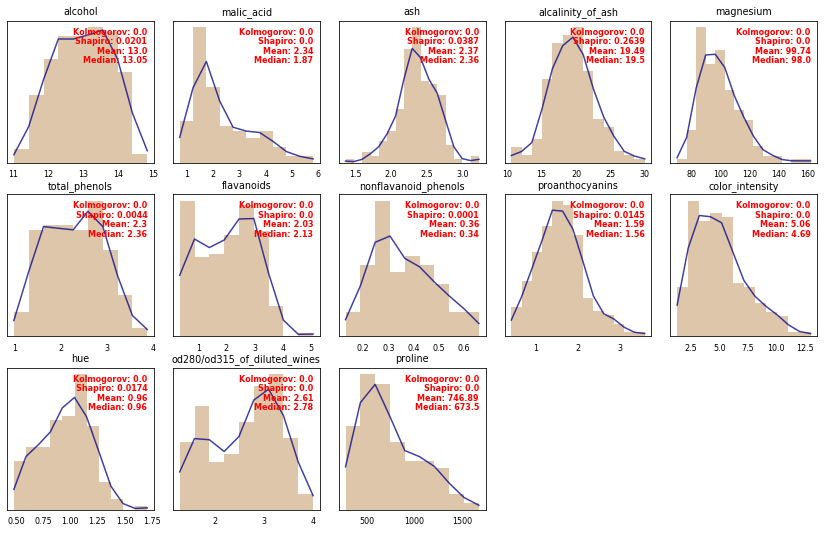

In [144]:
len_indicator= len(df.columns) % 5
num_of_subplot = 1
normality_report = pd.DataFrame(columns = df.columns, index = ('Kolmogorov', 'Shapiro', 'Mean', 'Median'))

if len_indicator == 0:
    length= len(df.columns)//5
elif len_indicator <= 5:
    length= len(df.columns)//5 + 1
else:
    length= len(df.columns)//5 + 2

figure = plt.figure(
        num= 1,
        figsize= (5*2.5, length*3),
        facecolor='w',
        )
plt.subplots_adjust(
        left= 0.1,
        right= 1,
        wspace= 0.13,
        hspace= 0.22
        )
plt.rc('font', size= 8)

for column in df:
    Kolmogorov = np.around((np.array(stats.kstest(df[column], 'norm'))),4)
    Shapiro_Wilk = np.around((np.array(stats.shapiro(df[column]))), 4)
    Mean = np.around((np.mean(df[column])),2)
    Median = np.around((np.median(df[column])),2)
    
    normality_report.loc['Kolmogorov', column] = Kolmogorov[1]; 
    normality_report.loc['Shapiro', column] = Shapiro_Wilk[1]
    normality_report.loc['Mean', column] = Mean; normality_report.loc['Median', column] = Median
    _, bins = np.histogram(df[column], bins= 'auto')
    
    plt.subplot(length, 5, num_of_subplot)
    y_axis, x_axis, _ = plt.hist(
            df[column],
            bins= bins,
            color= 'tan',
            density= True,
            alpha= 0.75,
            histtype= 'bar'
            )
    
    plt.title(column) 
    
    plt.tick_params(
            bottom= False,
            left= False
            )
    
    downward = 1
    for x in normality_report.index:       
        plt.text(
                x_axis.max(),
                y_axis.max()* downward,
                str(x) + ": " + str(normality_report.loc[x, column]),
                fontsize = 8,
                fontweight = 'bold',
                color = 'r',
                ha = 'right',
                va = 'top'
                )
        downward = downward - 0.07
    
    lineSP = np.linspace((np.min(bins)), (np.max(bins)), len(bins))
    df[column].plot.kde(color= 'darkblue', ind=lineSP, alpha = 0.75)
    plt.gca().axes.get_yaxis().set_visible(False)
    num_of_subplot = num_of_subplot + 1
    print(bins, len(bins))
plt.show()
